In [61]:
from pathlib import Path
import json
#import matplotlib.pyplot as plt

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

from IPython.display import Image

In [62]:
geoguessrId = ""

In [63]:
folder = Path(f"data/{geoguessrId}/")

md_file = folder / f"metadata_{geoguessrId}.json"
with md_file.open() as f:
    metadata = json.load(f)

loc_file = folder / f"locations_{geoguessrId}.json"
with loc_file.open() as f:
    location_data = json.load(f)

In [ ]:
print(metadata)
print(f"Map {geoguessrId} has {len(location_data['customCoordinates'])} locations")

In [65]:
location_data['customCoordinates'][0]

{'lat': 38.911633,
 'lng': -4.4669733,
 'heading': 295.65625,
 'pitch': 0,
 'zoom': 0,
 'panoId': '6IDizhyjEyiKTkblrU8tDQ',
 'countryCode': None,
 'stateCode': None}

<Axes: >

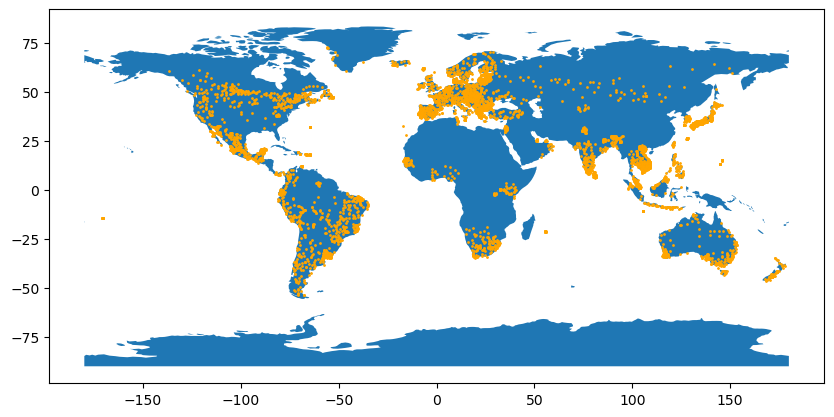

In [66]:
pano, geometry = [], []

for loc in location_data['customCoordinates']:
    pano.append(loc['panoId'])
    geometry.append(Point(loc['lng'], loc['lat']))

gdf = GeoDataFrame({"PanoId": pano, "geometry": geometry})   

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='orange', markersize=1)

In [67]:
panos = folder / "panorama"
metas = folder / "metas"

available = list(panos.glob("*.jpg"))

Meta: Short outer lines in Sweden
<p>If you feel like you're in one of the Nordic countries and see short dashed outer lines, you're likely in Sweden. Norway uses long dashed outer lines, and Finland uses full lines. (N)orway for normal, (S)weden for short, and (F)inland for full).</p>
<p>Warning: Many countries in Europe might also use short or medium dashed outer lines, so be cautious.</p>


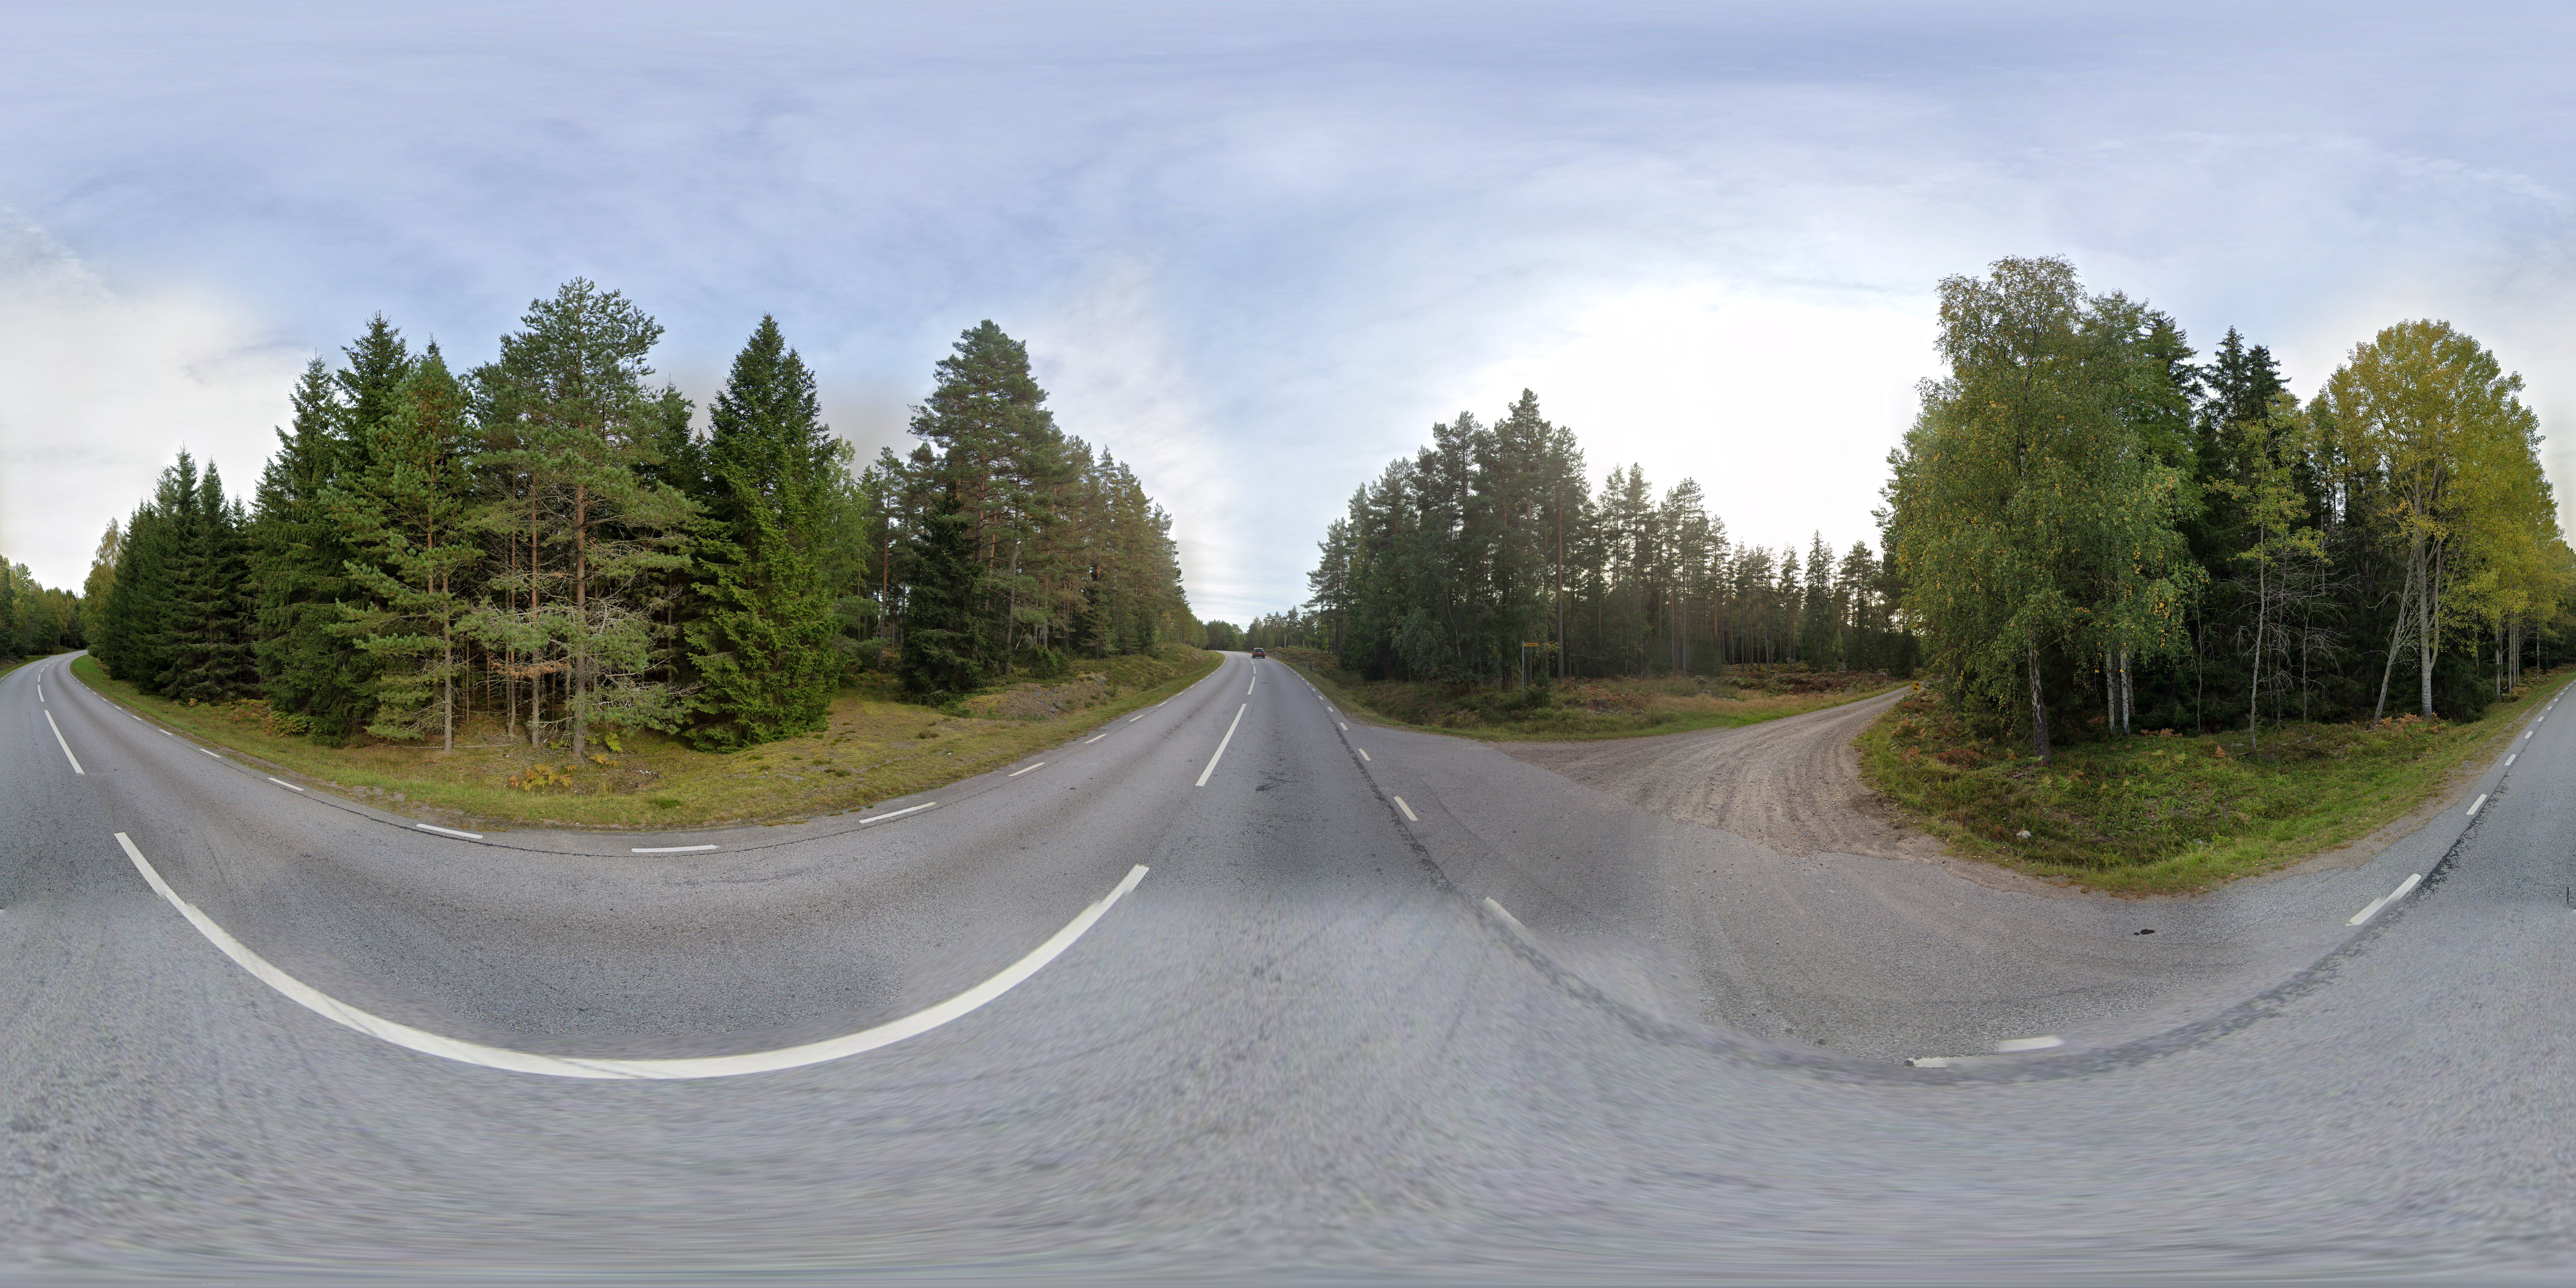

Check out  <a href="https://www.plonkit.net/sweden" rel="nofollow" target="_blank">www.plonkit.net/sweden</a> for more clues.<p>Meta taken from <a href="https://learnablemeta.com/maps/66c0d3feff4dbe492e06174e" rel ="nofollow" target="_blank"> A Learnable Meta World - Beginner </a> by <b>trausi</b></p>


In [69]:
which = 499

panoId = available[which].stem.split("_", maxsplit=1)[1]

with (metas / (panoId+".json")).open() as f:
    md = json.load(f)

print(f"Meta: {md['metaName']} in {md['country']}")
print(md['note'])

for im in md['images']:
    display(Image(url=im))

display(Image(filename=available[which]))

print(md['footer'])